<a href="https://colab.research.google.com/github/mornaeldernar/Bedu/blob/main/dulces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Equipo 18
- Alef Gama
- Arturo Solís
- Jacob Muñoz
- Javier Castillo
- Rafael Jiménez

# Identificación del problema

Debido a que se acerca Halloween, nos surgió la duda de que dulces son los que mas le gustan a las personas. Entonces analizaremos cuales son los dulces que más gustan.

# Planteamiento de preguntas

* ¿Cuál es el dulce que más le gusta a las personas?
* ¿Hay dulces que le gusten más a cierto rango de edad?
* ¿Cuál dulce le gusta más a los hombres?
* ¿Cuál dulce le gusta más a las mujeres?
* ¿Cuales son el top 5 de dulces en estados unidos?
* ¿Podremos obtener información de los dulces de otros paises?


# Recolección de datos

Estuvimos buscando datos que nos ayudaran a resolver las preguntas planteadas y encontramos una página que se dedicó a hacer encuestas sobre los dulces en 2017 https://www.scq.ubc.ca/so-much-candy-data-seriously/ 

|||
| --- | :---|
|**Archivo CSV:** | https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv |
|**Archivo XLSX:** | https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.xlsx |
|**Encuesta:** | https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchysurvey2017.pdf |
|**Fuente:** | https://www.scq.ubc.ca/so-much-candy-data-seriously/ |

## Importando librerias

In [126]:
import pandas as pd
import numpy as np
from google.colab import files, data_table

## Carga de nuestro conjunto de datos

In [127]:
# Subir CSV como DataFrame
print('''1.- Descarga el archivo "candyhierarchy2017.csv" desde:
https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv
2.- ↓ Desde tu equipo, elige el archivo ↓''')
files.upload()
try:
  df = pd.read_csv('candyhierarchy2017.csv', encoding = "ISO-8859-1")
  print('''
Archivo "candyhierarchy2017.csv" guardado como DataFrame.
Puedes comenzar tu análisis''')
except:
  print('Ocurrió un error. Revisa el archivo CSV tu ruta de acceso')

1.- Descarga el archivo "candyhierarchy2017.csv" desde:
https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv
2.- ↓ Desde tu equipo, elige el archivo ↓



Archivo "candyhierarchy2017.csv" guardado como DataFrame.
Puedes comenzar tu análisis


In [128]:
#df = pd.read_csv('https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv', encoding = "ISO-8859-1")

# Análisis exploratorio de datos
Visualizamos los datos para darnos una idea de como estan




In [129]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [130]:
df.shape

(2460, 120)

In [131]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

Como son 120 columnas, se crea una función para ver el total de NaNs y su porcentaje como tabla interactiva. Para facilitar la exploración de los datos.

In [132]:
# Ver columna + Total Nans + Porcentaje
def porcentaje_vacios ():
  nans = pd.DataFrame({'columns': df.columns, 'totalNans': df.isna().sum(), 'percentages' : df.isna().sum()/len(df)*100})
  data_table.enable_dataframe_formatter()
  return data_table.DataTable(nans, include_index=False, num_rows_per_page=20)
  data_table.disable_dataframe_formatter()
porcentaje_vacios()

,columns,totalNans,percentages
Internal ID,Internal ID,0,0.000000
Q1: GOING OUT?,Q1: GOING OUT?,110,4.471545
Q2: GENDER,Q2: GENDER,41,1.666667
Q3: AGE,Q3: AGE,84,3.414634
Q4: COUNTRY,Q4: COUNTRY,64,2.601626
...,...,...,...
Q12: MEDIA [Daily Dish],Q12: MEDIA [Daily Dish],2375,96.544715
Q12: MEDIA [Science],Q12: MEDIA [Science],1098,44.634146
Q12: MEDIA [ESPN],Q12: MEDIA [ESPN],2361,95.975610
Q12: MEDIA [Yahoo],Q12: MEDIA [Yahoo],2393,97.276423


In [133]:
porcentaje_vacios()

,columns,totalNans,percentages
Internal ID,Internal ID,0,0.000000
Q1: GOING OUT?,Q1: GOING OUT?,110,4.471545
Q2: GENDER,Q2: GENDER,41,1.666667
Q3: AGE,Q3: AGE,84,3.414634
Q4: COUNTRY,Q4: COUNTRY,64,2.601626
...,...,...,...
Q12: MEDIA [Daily Dish],Q12: MEDIA [Daily Dish],2375,96.544715
Q12: MEDIA [Science],Q12: MEDIA [Science],1098,44.634146
Q12: MEDIA [ESPN],Q12: MEDIA [ESPN],2361,95.975610
Q12: MEDIA [Yahoo],Q12: MEDIA [Yahoo],2393,97.276423


Eliminamos el internal id y Unnamed:113 que es la imagen de un vestido(no es una pregunta en realidad), y las preguntas q7,q8,q9 son preguntas abiertas.

In [134]:
df.drop(columns=['Internal ID','Unnamed: 113','Q9: OTHER COMMENTS','Q8: DESPAIR OTHER','Q7: JOY OTHER'], inplace=True)

In [135]:
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [136]:
df.shape

(2460, 115)

Elminamos filas que tengan todos los valores vacios

In [137]:
df.dropna(how="all", inplace=True)

In [138]:
df.shape

(2439, 115)

In [139]:
porcentaje_vacios()

,columns,totalNans,percentages
Q1: GOING OUT?,Q1: GOING OUT?,89,3.649036
Q2: GENDER,Q2: GENDER,20,0.820008
Q3: AGE,Q3: AGE,63,2.583026
Q4: COUNTRY,Q4: COUNTRY,43,1.763018
"Q5: STATE, PROVINCE, COUNTY, ETC","Q5: STATE, PROVINCE, COUNTY, ETC",79,3.239032
...,...,...,...
Q12: MEDIA [Daily Dish],Q12: MEDIA [Daily Dish],2354,96.514965
Q12: MEDIA [Science],Q12: MEDIA [Science],1077,44.157442
Q12: MEDIA [ESPN],Q12: MEDIA [ESPN],2340,95.940959
Q12: MEDIA [Yahoo],Q12: MEDIA [Yahoo],2372,97.252973


Usamos una función para visualizar como tabla interactiva el porcentaje de NaNs de las 115 columnas.

In [140]:
porcentaje_vacios()

,columns,totalNans,percentages
Q1: GOING OUT?,Q1: GOING OUT?,89,3.649036
Q2: GENDER,Q2: GENDER,20,0.820008
Q3: AGE,Q3: AGE,63,2.583026
Q4: COUNTRY,Q4: COUNTRY,43,1.763018
"Q5: STATE, PROVINCE, COUNTY, ETC","Q5: STATE, PROVINCE, COUNTY, ETC",79,3.239032
...,...,...,...
Q12: MEDIA [Daily Dish],Q12: MEDIA [Daily Dish],2354,96.514965
Q12: MEDIA [Science],Q12: MEDIA [Science],1077,44.157442
Q12: MEDIA [ESPN],Q12: MEDIA [ESPN],2340,95.940959
Q12: MEDIA [Yahoo],Q12: MEDIA [Yahoo],2372,97.252973


Creamos una funcion para cambiar el nombre a los encabezados quitantdo el numero de pregunta

In [141]:
columnas = df.columns.to_list()
def new_columns() :
  nueva_columna = []
  for i in columnas:
    if i[2] == ':' :
      nueva_columna.append(i[4:])
      #print(i[4:])
    elif i[3] == ':' or i[3] == '|' :
      nueva_columna.append(i[5:])
      #print(i[5:])
    else:
      nueva_columna.append(i)
      #print(i)
  return nueva_columna
df.columns = new_columns()

In [142]:
columnas = df.columns[5:].to_list()

In [143]:
columnas

['100 Grand Bar',
 'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Candy that is clearly just the stuff given out for free at restaurants',
 'Caramellos',
 'Cash, or other forms of legal tender',
 'Chardonnay',
 'Chick-o-Sticks (we donÕt know what that is)',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Brand Acetaminophen',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 'HersheyÕs Milk Chocolate',
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Rancher (bad flavor)',
 'Jolly Ranchers (good f

Eliminamos las filas que no validaron el proceso de envio de la encuesta.

In [144]:
df = df.dropna(subset=['Click Coordinates (x, y)'], axis=0)

In [145]:
df.shape

(1605, 115)

Eliminamos las columnas de validacion de encuesta

In [146]:
df.drop(columns=['MEDIA [ESPN]','MEDIA [Daily Dish]','MEDIA [Science]','MEDIA [Yahoo]','Click Coordinates (x, y)'], inplace=True)

In [147]:
df.shape

(1605, 110)

In [225]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,0,0.0
GENDER,GENDER,0,0.0
AGE,AGE,0,0.0
COUNTRY,COUNTRY,0,0.0
100 Grand Bar,100 Grand Bar,0,0.0
...,...,...,...
Vicodin,Vicodin,0,0.0
Whatchamacallit Bars,Whatchamacallit Bars,0,0.0
White Bread,White Bread,0,0.0
Whole Wheat anything,Whole Wheat anything,0,0.0


logramos bajar a un 20.74% de datos vacios en la columna que tiene mas datos vacios

checaremos cuantos no contestaron la pregunta de genero

In [149]:
df['GENDER'].isna().sum()

9

Consideraremos si eliminamos los que no contestaron el genero, pero los dejaremos para después. Por eso no le hacemos un inplace=True o asignamos a la variable df

In [150]:
df.dropna(subset=['GENDER'], axis=0)

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
5,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,...,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN
7,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,...,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,No,Female,40,canada,bc,MEH,DESPAIR,JOY,DESPAIR,MEH,...,DESPAIR,JOY,DESPAIR,DESPAIR,NaN,DESPAIR,DESPAIR,JOY,White and gold,Sunday
2454,No,Female,26,USA,Michigan,JOY,MEH,JOY,DESPAIR,MEH,...,JOY,JOY,MEH,MEH,JOY,MEH,MEH,JOY,White and gold,Friday
2456,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,NaN,...,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY,Blue and black,Friday
2457,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,MEH,...,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,Blue and black,Friday


Obtenemos todas las columnas que pertenecen a la pregunta 6. La cual es de opcion multiple y tiene 3 opciones: 'JOY','MEH','DESPAIR'

In [151]:
columnas_pregunta_6 = df.columns[5:-2]

Creamos una funcion que nos da los valores únicos de respuesta y los transforma en un diccionario para utilizar la funcion map posteriormente




In [152]:
def column_to_dictionary(column) :
  dictionary = pd.DataFrame(column.unique().tolist()).to_dict()[0]
  return {x:y for y, x in dictionary.items()}

Transformamos las respuestas de la pregunta 6 en un dictionario

In [153]:
series_name = column_to_dictionary(df[df.columns[5]])
series_name

{'MEH': 0, 'JOY': 1, nan: 2, 'DESPAIR': 3}

observamos que quedan nan en la columna

In [154]:
len(df)

1605

creamos una funcion que cuenta cuantos joy, meh, despair y vacios tiene cada columna que le pasemos

In [155]:
def column_values_count(column_name) :
  joy = [i == 'JOY'  for i in df[column_name]].count(True)
  meh = [i == 'MEH' for i in df[column_name]].count(True)
  despair = [i == 'DESPAIR' for i in df[column_name]].count(True)
  nan = len(df) - joy - meh - despair
  print(column_name, joy, meh, despair, nan, len(df), max([joy, meh, despair]))

hacemos un ciclo con todas las columnas de la pregunta 6 para analizar los datos de joy, meh, despair, para ver si encontramos patrones y saber que hacer con los datos

In [156]:
for i in columnas_pregunta_6 :
  column_values_count(i)

100 Grand Bar 777 674 72 82 1605 777
Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes) 151 404 980 70 1605 980
Any full-sized candy bar 1395 182 14 14 1605 1395
Black Jacks 83 544 704 274 1605 704
Bonkers (the candy) 102 771 432 300 1605 771
Bonkers (the board game) 179 629 487 310 1605 629
Bottle Caps 408 602 504 91 1605 602
Box'o'Raisins 98 427 1058 22 1605 1058
Broken glow stick 22 91 1454 38 1605 1454
Butterfinger 1040 412 130 23 1605 1040
Cadbury Creme Eggs 742 489 353 21 1605 742
Candy Corn 431 500 658 16 1605 658
Candy that is clearly just the stuff given out for free at restaurants 37 357 1187 24 1605 1187
Caramellos 846 532 145 82 1605 846
Cash, or other forms of legal tender 1286 242 57 20 1605 1286
Chardonnay 938 316 276 75 1605 938
Chick-o-Sticks (we donÕt know what that is) 261 506 577 261 1605 577
Chiclets 222 664 677 42 1605 677
Coffee Crisp 424 520 484 177 1605 520
Creepy Religious comics/Chick Tracts 213 94 1261 37 1605 1261
Dental paraph

Como no encontramos patrones visiblemente, cecidimos crear una nueva clasificacion llamada NC(no contesto) para no alterar los datos y llenamos los na con esta nueva clasificación

In [157]:
df2 = df.copy()

In [158]:
df2[df2.columns[5:-2]] = df2[df2.columns[5:-2]].fillna("NC")

In [159]:
df = df2.copy()

para la pregunta 6 ya no hay vacios

In [160]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,9,0.560748
AGE,AGE,30,1.869159
COUNTRY,COUNTRY,16,0.996885
"STATE, PROVINCE, COUNTY, ETC","STATE, PROVINCE, COUNTY, ETC",35,2.180685
...,...,...,...
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000
York Peppermint Patties,York Peppermint Patties,0,0.000000
DRESS,DRESS,27,1.682243


In [161]:
series_name = column_to_dictionary(df[df.columns[5]])
series_name

{'MEH': 0, 'JOY': 1, 'NC': 2, 'DESPAIR': 3}

Transformamos los datos de estas columnas a numerico con el diccionario que viene arriba

In [162]:
for column_name in df.columns[5:-2]:
  df[column_name]=df[column_name].map(series_name)
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY
1,No,Male,44,USA,NM,0,3,1,0,3,...,3,1,3,3,3,3,3,3,White and gold,Sunday
3,No,Male,40,us,or,0,3,1,0,0,...,0,1,3,1,1,3,3,3,White and gold,Sunday
4,No,Male,23,usa,exton pa,1,3,1,3,0,...,3,1,0,1,1,3,3,1,White and gold,Friday
5,No,Male,NaN,NaN,NaN,1,3,1,2,2,...,0,1,3,3,1,3,3,1,NaN,NaN
7,No,Male,33,canada,ontario,1,3,1,3,3,...,3,1,1,0,3,3,3,3,Blue and black,Friday


buscamos que otras columnas son de tipo objeto y vemos su informacion

In [163]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 1 to 2459
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   GOING OUT?                    1552 non-null   object
 1   GENDER                        1596 non-null   object
 2   AGE                           1575 non-null   object
 3   COUNTRY                       1589 non-null   object
 4   STATE, PROVINCE, COUNTY, ETC  1570 non-null   object
 5   DRESS                         1578 non-null   object
 6   DAY                           1594 non-null   object
dtypes: object(7)
memory usage: 100.3+ KB


Analizaremos la edad, para tratar de entender los datos que no son numéricos

In [164]:
for val in df['AGE'] :
  if(not(str(val).isnumeric())):
      print(val)

nan
Old enough
Many
?
no
nan
nan
nan
nan
45-55
nan
nan
nan
hahahahaha
nan
nan
nan
nan
older than dirt
nan
nan
nan
Enough
See question 2
nan
24-50
nan
ancient
nan
nan
nan
nan
nan
nan
old
nan
nan
nan
MY NAME JEFF
59 on the day after Halloween
old enough
nan
nan
nan
I can remember when Java was a cool new language
nan


los datos que intuimos que son numericos pero vienen en forma de rango o con texto extra los transformamos al numero sin el texto, o al promedio del rango

In [165]:
df['AGE'] = df['AGE'].replace(['59 on the day after Halloween'],59)
df['AGE'] = df['AGE'].replace(['24-50'],37)
df['AGE'] = df['AGE'].replace(['45-55'],50)


Transformamos los valores que son texto y no nos dan información de la edad en nan, para luego llenarlos con el promedio

In [166]:
lista_edades_string = []
for id, val in enumerate(df['AGE']):
  if(not(str(val).isnumeric())):
    if not(str(val)) == "nan":
      lista_edades_string.append(val)
df['AGE']=df['AGE'].replace(lista_edades_string, np.nan)

verificamos que nos queden solo nan

In [167]:
for val in df['AGE'] :
  if(not(str(val).isnumeric())):
      print(val)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


obtenemos el promedio de edad en tipo entero

In [168]:
df[df['AGE'].notna()]['AGE'].astype(int).mean().astype(int)

43

asignamos a los vacios el promedio de la edad

In [169]:
df['AGE']=df['AGE'].fillna(df[df['AGE'].notna()]['AGE'].astype(int).mean().astype(int))

In [170]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,9,0.560748
AGE,AGE,0,0.000000
COUNTRY,COUNTRY,16,0.996885
"STATE, PROVINCE, COUNTY, ETC","STATE, PROVINCE, COUNTY, ETC",35,2.180685
...,...,...,...
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000
York Peppermint Patties,York Peppermint Patties,0,0.000000
DRESS,DRESS,27,1.682243


Ahora analizamos el país

In [171]:
df['COUNTRY'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'USA',
       'uk', 'United States', 'united states', 'United staes',
       'United Kingdom', 'United States of America', 'UAE',
       'United States ', 'England', 'Usa', 'canada ', 'United states',
       'USAUSAUSA', 'america', 'france', 'United States of America ',
       'U.S.A.', 'Mexico', 'Canada ', 'united states of america',
       'US of A', 'UK', 'Unites States', 'The United States',
       'North Carolina ', 'Netherlands', 'Earth', 'U S', 'u.s.',
       'Costa Rica', 'The United States of America', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'United State',
       'France', 'U.S.', 'A', 'Can', 'Canae', 'Trumpistan', 'Ireland',
       'United Sates', 'Korea', 'Australia', 'California', 'Japan', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Iceland', 'Scotland', 'Denmark', 'France ', 'Uk',
       'Switzerland', 'Ahem....Am

hay muchas formas en las que escriben los paises, empezaremos por limpiar estados unidos

In [172]:
usa = ['USA ', 'us', 'usa',  'Us', 'US', 'USA',
       'United States', 'united states', 'United staes','United States of America', 
       'United States ',  'Usa', 'United states',
       'USAUSAUSA', 'america',  'United States of America ',
       'U.S.A.',  'united states of america',
       'US of A',  'Unites States', 'The United States',
       'North Carolina ', 'U S', 'u.s.', 'The United States of America',  'USA? Hard to tell anymore..', "'merica", 'United State', 'U.S.',  'Trumpistan',
       'United Sates', 'California','USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Ahem....Amerca',  'New Jersey','United Stated','America', 'United Statss', 'united States ',
       'N. America',  'USSA', 'u s a', 'United Statea', 'USA USA USA!!!!',
       ]

In [173]:
df['COUNTRY'] = df['COUNTRY'].replace(usa,'USA')

In [174]:
df['COUNTRY'].unique()

array(['USA', nan, 'canada', 'Canada', 'uk', 'United Kingdom', 'UAE',
       'England', 'canada ', 'france', 'Mexico', 'Canada ', 'UK',
       'Netherlands', 'Earth', 'Costa Rica', 'insanity lately', 'Greece',
       'France', 'A', 'Can', 'Canae', 'Ireland', 'Korea', 'Australia',
       'Japan', 'Iceland', 'Scotland', 'Denmark', 'France ', 'Uk',
       'Switzerland', 'South Korea', 'CANADA', 'Germany', 'endland',
       'Atlantis', 'murrika', 'germany', 'Singapore', 'Taiwan', 'China',
       'spain', 'Narnia', 'subscribe to dm4uz3 on youtube',
       "I don't know anymore", 'Fear and Loathing'], dtype=object)

Ahora Canada

In [175]:
canada = ['canada', 'Canada',  'canada ',  'Canada ', 'Can', 'Canae',  'CANADA',]

In [176]:
df['COUNTRY'] = df['COUNTRY'].replace(canada,'Canada')

In [177]:
df['COUNTRY'].unique()

array(['USA', nan, 'Canada', 'uk', 'United Kingdom', 'UAE', 'England',
       'france', 'Mexico', 'UK', 'Netherlands', 'Earth', 'Costa Rica',
       'insanity lately', 'Greece', 'France', 'A', 'Ireland', 'Korea',
       'Australia', 'Japan', 'Iceland', 'Scotland', 'Denmark', 'France ',
       'Uk', 'Switzerland', 'South Korea', 'Germany', 'endland',
       'Atlantis', 'murrika', 'germany', 'Singapore', 'Taiwan', 'China',
       'spain', 'Narnia', 'subscribe to dm4uz3 on youtube',
       "I don't know anymore", 'Fear and Loathing'], dtype=object)

Ahora Reino Unido

In [178]:
uk = ['uk', 'United Kingdom',  'England',
        'UK', 
       'Uk',  'endland',
       ]

In [179]:
df['COUNTRY'] = df['COUNTRY'].replace(uk,'UK')
df['COUNTRY'].unique()

array(['USA', nan, 'Canada', 'UK', 'UAE', 'france', 'Mexico',
       'Netherlands', 'Earth', 'Costa Rica', 'insanity lately', 'Greece',
       'France', 'A', 'Ireland', 'Korea', 'Australia', 'Japan', 'Iceland',
       'Scotland', 'Denmark', 'France ', 'Switzerland', 'South Korea',
       'Germany', 'Atlantis', 'murrika', 'germany', 'Singapore', 'Taiwan',
       'China', 'spain', 'Narnia', 'subscribe to dm4uz3 on youtube',
       "I don't know anymore", 'Fear and Loathing'], dtype=object)

Pondremos vacios los datos que no son paises conocidos o paises inventados

In [180]:
empty = [ 'Earth','insanity lately',  'A', 'Atlantis', 'murrika', 'Narnia', 'subscribe to dm4uz3 on youtube',
       "I don't know anymore", 'Fear and Loathing']

In [181]:
df['COUNTRY'] = df['COUNTRY'].replace(empty,np.nan)
df['COUNTRY'].unique()

array(['USA', nan, 'Canada', 'UK', 'UAE', 'france', 'Mexico',
       'Netherlands', 'Costa Rica', 'Greece', 'France', 'Ireland',
       'Korea', 'Australia', 'Japan', 'Iceland', 'Scotland', 'Denmark',
       'France ', 'Switzerland', 'South Korea', 'Germany', 'germany',
       'Singapore', 'Taiwan', 'China', 'spain'], dtype=object)

Ponemos los nombres de paises en mayusculas

y les quitamos los espacios al final y principio ¿Porqué no se nos ocurrio eso primero?

In [182]:
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['COUNTRY']=df['COUNTRY'].str.strip()

Verificamos que no tengamos duplicados

In [183]:
pd.Series(df['COUNTRY'].unique()).sort_values()

12      AUSTRALIA
2          CANADA
22          CHINA
8      COSTA RICA
16        DENMARK
5          FRANCE
19        GERMANY
9          GREECE
14        ICELAND
10        IRELAND
13          JAPAN
11          KOREA
6          MEXICO
7     NETHERLANDS
15       SCOTLAND
20      SINGAPORE
18    SOUTH KOREA
23          SPAIN
17    SWITZERLAND
21         TAIWAN
4             UAE
3              UK
0             USA
1             NaN
dtype: object

Asignamos los vacios a un pais que se llama 'No respondio'

In [184]:
df['COUNTRY']=df['COUNTRY'].fillna('NO RESPONDIO')

In [185]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,9,0.560748
AGE,AGE,0,0.000000
COUNTRY,COUNTRY,0,0.000000
"STATE, PROVINCE, COUNTY, ETC","STATE, PROVINCE, COUNTY, ETC",35,2.180685
...,...,...,...
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000
York Peppermint Patties,York Peppermint Patties,0,0.000000
DRESS,DRESS,27,1.682243


Retomamos el genero

In [186]:
df['GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

Llenamos los vacios con la respuesta "I'd rather not say" debido a que no lo contestaron



In [187]:
df['GENDER']=df['GENDER'].fillna("I'd rather not say")

In [188]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,0,0.000000
AGE,AGE,0,0.000000
COUNTRY,COUNTRY,0,0.000000
"STATE, PROVINCE, COUNTY, ETC","STATE, PROVINCE, COUNTY, ETC",35,2.180685
...,...,...,...
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000
York Peppermint Patties,York Peppermint Patties,0,0.000000
DRESS,DRESS,27,1.682243


Ahora vamos a analizar el estado

In [189]:
df['STATE, PROVINCE, COUNTY, ETC'].isna().sum()

35

In [190]:
len(df['STATE, PROVINCE, COUNTY, ETC'].unique())

410

Eliminaremos la columna debido a que hay muchos datos únicos y la pregunta es abierta

In [191]:
df.drop(columns=['STATE, PROVINCE, COUNTY, ETC'], inplace=True)

In [192]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,0,0.000000
AGE,AGE,0,0.000000
COUNTRY,COUNTRY,0,0.000000
100 Grand Bar,100 Grand Bar,0,0.000000
...,...,...,...
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000
York Peppermint Patties,York Peppermint Patties,0,0.000000
DRESS,DRESS,27,1.682243


Decidimos eliminar DAY y DRESS tambien porque son preguntas sarcasticas, eso dice la encuesta

In [193]:
df.drop(columns=['DAY','DRESS'], inplace=True)

In [194]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,53,3.302181
GENDER,GENDER,0,0.000000
AGE,AGE,0,0.000000
COUNTRY,COUNTRY,0,0.000000
100 Grand Bar,100 Grand Bar,0,0.000000
...,...,...,...
Vicodin,Vicodin,0,0.000000
Whatchamacallit Bars,Whatchamacallit Bars,0,0.000000
White Bread,White Bread,0,0.000000
Whole Wheat anything,Whole Wheat anything,0,0.000000


In [195]:
df['GOING OUT?'].unique()

array(['No', 'Yes', nan], dtype=object)

decidimos dejar los vacios porque los transformaremos en un diccionario y sera como si respondieran no contesto

In [196]:
columnas_object = df.select_dtypes(include=object).columns.tolist()

In [197]:
columnas_object.remove('AGE')

In [198]:
columnas_object

['GOING OUT?', 'GENDER', 'COUNTRY']

Transformamos las columnas en diccionarios

In [199]:
for i in columnas_object :
  print(column_to_dictionary(df[i]))
  df[i] = df[i].map(column_to_dictionary(df[i]))

{'No': 0, 'Yes': 1, nan: 2}
{'Male': 0, 'Female': 1, "I'd rather not say": 2, 'Other': 3}
{'USA': 0, 'NO RESPONDIO': 1, 'CANADA': 2, 'UK': 3, 'UAE': 4, 'FRANCE': 5, 'MEXICO': 6, 'NETHERLANDS': 7, 'COSTA RICA': 8, 'GREECE': 9, 'IRELAND': 10, 'KOREA': 11, 'AUSTRALIA': 12, 'JAPAN': 13, 'ICELAND': 14, 'SCOTLAND': 15, 'DENMARK': 16, 'SWITZERLAND': 17, 'SOUTH KOREA': 18, 'GERMANY': 19, 'SINGAPORE': 20, 'TAIWAN': 21, 'CHINA': 22, 'SPAIN': 23}


In [200]:
df.select_dtypes(include=object).columns.tolist()

['AGE']

solo queda la edad y la transformamos en tipo de dato int

In [201]:
df['AGE'] = df['AGE'].astype(int)

Verificamos que no queden columnas vacias 

In [202]:
porcentaje_vacios()

,columns,totalNans,percentages
GOING OUT?,GOING OUT?,0,0.0
GENDER,GENDER,0,0.0
AGE,AGE,0,0.0
COUNTRY,COUNTRY,0,0.0
100 Grand Bar,100 Grand Bar,0,0.0
...,...,...,...
Vicodin,Vicodin,0,0.0
Whatchamacallit Bars,Whatchamacallit Bars,0,0.0
White Bread,White Bread,0,0.0
Whole Wheat anything,Whole Wheat anything,0,0.0


verificamos que no queden columnas de otro tipo que no sean int

In [203]:
len(df.select_dtypes(include=int).columns.tolist()) - df.shape[1]

0

Tenemos nuestro dataset listo para trabajarlo y responder las preguntas

In [204]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,0,0,44,0,0,3,1,0,3,3,...,1,1,3,1,3,3,3,3,3,3
3,0,0,40,0,0,3,1,0,0,3,...,3,1,0,1,3,1,1,3,3,3
4,0,0,23,0,1,3,1,3,0,3,...,1,1,3,1,0,1,1,3,3,1
5,0,0,43,1,1,3,1,2,2,2,...,1,1,0,1,3,3,1,3,3,1
7,0,0,33,2,1,3,1,3,3,0,...,1,0,3,1,1,0,3,3,3,3


# Respuestas a las preguntas planteadas

## ¿Cuál es el dulce que más le gusta a las personas?

In [205]:
series_name

{'MEH': 0, 'JOY': 1, 'NC': 2, 'DESPAIR': 3}

Buscaremos cual es el que tiene mas JOY

In [206]:
dulces_mas_queridos = df[df[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)

In [226]:
dulces_mas_queridos

Any full-sized candy bar                                                  1395
ReeseÕs Peanut Butter Cups                                                1329
Kit Kat                                                                   1287
Cash, or other forms of legal tender                                      1286
Twix                                                                      1263
                                                                          ... 
JoyJoy (Mit Iodine!)                                                        67
Gum from baseball cards                                                     39
Candy that is clearly just the stuff given out for free at restaurants      37
White Bread                                                                 37
Broken glow stick                                                           22
Length: 103, dtype: int64

In [207]:
print('Los dulces que producen mayor felicidad son:',dulces_mas_queridos[0:1].index[0],"con",dulces_mas_queridos[0:1][0],"respuestas")

Los dulces que producen mayor felicidad son: Any full-sized candy bar con 1395 respuestas


## ¿Hay dulces que le gusten más a cierto rango de edad?

In [208]:
rangos_edad = [(0,10),(11,20),(21,30),(31,40),(41,50),(51,60),(61,70),(71,80),(81,90),(91,150)]

In [209]:
for i in rangos_edad:
  edades = df[(df['AGE']>=i[0])&(df['AGE']<=i[1])].copy()
  
  dulces_mas_queridos_por_edad = edades[edades[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)
  print('Los dulces que producen mayor felicidad para las edades entre [',i[0],' y ',i[1],'] son:',dulces_mas_queridos_por_edad[0:1].index[0],"con",dulces_mas_queridos_por_edad[0:1][0],"respuestas")

Los dulces que producen mayor felicidad para las edades entre [ 0  y  10 ] son: Cash, or other forms of legal tender con 8 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 11  y  20 ] son: Cash, or other forms of legal tender con 36 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 21  y  30 ] son: Any full-sized candy bar con 144 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 31  y  40 ] son: Any full-sized candy bar con 430 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 41  y  50 ] son: Any full-sized candy bar con 469 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 51  y  60 ] son: ReeseÕs Peanut Butter Cups con 227 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 61  y  70 ] son: Any full-sized candy bar con 72 respuestas
Los dulces que producen mayor felicidad para las edades entre [ 71  y  80 ] son: Cash, or other forms of

## ¿Cuál dulce le gusta más a los hombres?


{'Male': 0, 'Female': 1, "I'd rather not say": 2, 'Other': 3}


In [210]:
hombres=df[df['GENDER']==0].copy()

In [211]:
dulces_mas_queridos_por_hombres = hombres[hombres[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)

In [212]:
print('Los dulces que producen mayor felicidad a los hombres son:',dulces_mas_queridos_por_hombres[0:1].index[0],"con",dulces_mas_queridos_por_hombres[0:1][0],"respuestas")

Los dulces que producen mayor felicidad a los hombres son: Any full-sized candy bar con 843 respuestas


## ¿Cuál dulce le gusta más a las mujeres?

In [213]:
mujeres=df[df['GENDER']==1].copy()

In [214]:
dulces_mas_queridos_por_mujeres = mujeres[mujeres[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)

In [215]:
print('Los dulces que producen mayor felicidad a los mujeres son:',dulces_mas_queridos_por_mujeres[0:1].index[0],"con",dulces_mas_queridos_por_mujeres[0:1][0],"respuestas")

Los dulces que producen mayor felicidad a los mujeres son: Any full-sized candy bar con 483 respuestas


## ¿Cuales son el top 5 de dulces en estados unidos?

{'USA': 0, 'NO RESPONDIO': 1, 'CANADA': 2, 'UK': 3, 'UAE': 4, 'FRANCE': 5, 'MEXICO': 6, 'NETHERLANDS': 7, 'COSTA RICA': 8, 'GREECE': 9, 'IRELAND': 10, 'KOREA': 11, 'AUSTRALIA': 12, 'JAPAN': 13, 'ICELAND': 14, 'SCOTLAND': 15, 'DENMARK': 16, 'SWITZERLAND': 17, 'SOUTH KOREA': 18, 'GERMANY': 19, 'SINGAPORE': 20, 'TAIWAN': 21, 'CHINA': 22, 'SPAIN': 23}

In [216]:
usa = df[df['COUNTRY']==0].copy()

In [217]:
dulces_mas_queridos_de_usa = usa[usa[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)
print('Los 5 dulces que producen mayor felicidad a USA son:')
for i in range(0,5):
  print((i+1),'.-',dulces_mas_queridos_de_usa[i:i+1].index[0],"con",dulces_mas_queridos_de_usa[i:i+1][0],"respuestas")

Los 5 dulces que producen mayor felicidad a USA son:
1 .- Any full-sized candy bar con 1191 respuestas
2 .- ReeseÕs Peanut Butter Cups con 1138 respuestas
3 .- Kit Kat con 1106 respuestas
4 .- Twix con 1101 respuestas
5 .- Cash, or other forms of legal tender con 1096 respuestas


## ¿Podremos obtener información de los dulces de otros paises?

In [218]:
paises = {'USA': 0, 'NO RESPONDIO': 1, 'CANADA': 2, 'UK': 3, 'UAE': 4, 'FRANCE': 5, 'MEXICO': 6, 'NETHERLANDS': 7, 'COSTA RICA': 8, 'GREECE': 9, 'IRELAND': 10, 'KOREA': 11, 'AUSTRALIA': 12, 'JAPAN': 13, 'ICELAND': 14, 'SCOTLAND': 15, 'DENMARK': 16, 'SWITZERLAND': 17, 'SOUTH KOREA': 18, 'GERMANY': 19, 'SINGAPORE': 20, 'TAIWAN': 21, 'CHINA': 22, 'SPAIN': 23}

In [219]:
def dulces_paises(valor, indice):
  pais = df[df['COUNTRY']==indice].copy()
  dulces_mas_queridos_de_pais = pais[pais[columnas_pregunta_6] == 1][columnas_pregunta_6].count().sort_values(ascending=False)
  print('* Los dulces que producen mayor felicidad a',valor,'son:',dulces_mas_queridos_de_pais[0:1].index[0],"con",dulces_mas_queridos_de_pais[0:1][0],"respuestas")

In [220]:
{dulces_paises(val,x) for x, val in enumerate(paises)}

* Los dulces que producen mayor felicidad a USA son: Any full-sized candy bar con 1191 respuestas
* Los dulces que producen mayor felicidad a NO RESPONDIO son: Any full-sized candy bar con 22 respuestas
* Los dulces que producen mayor felicidad a CANADA son: Any full-sized candy bar con 132 respuestas
* Los dulces que producen mayor felicidad a UK son: Rolos con 17 respuestas
* Los dulces que producen mayor felicidad a UAE son: Skittles con 1 respuestas
* Los dulces que producen mayor felicidad a FRANCE son: Milky Way con 3 respuestas
* Los dulces que producen mayor felicidad a MEXICO son: Pixy Stix con 2 respuestas
* Los dulces que producen mayor felicidad a NETHERLANDS son: Smarties (Commonwealth) con 3 respuestas
* Los dulces que producen mayor felicidad a COSTA RICA son: 100 Grand Bar con 1 respuestas
* Los dulces que producen mayor felicidad a GREECE son: York Peppermint Patties con 1 respuestas
* Los dulces que producen mayor felicidad a IRELAND son: Nestle Crunch con 2 respuesta

{None}

In [221]:
pip install qrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [222]:
import qrcode

In [223]:
data = ('https://github.com/mornaeldernar/Bedu/blob/main/dulces.ipynb')
img = qrcode.make(data)
img.save('MyQRCode1.png')

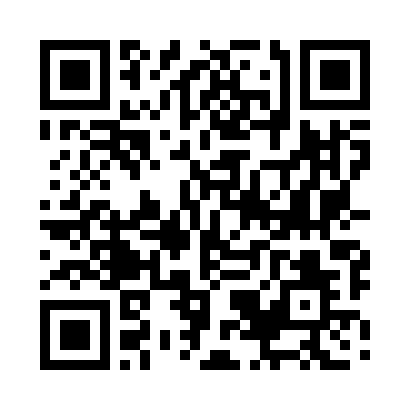

In [224]:
from IPython.display import Image
Image('MyQRCode1.png')